#📌 Extracão

In [2]:
# importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url_csv = 'https://raw.githubusercontent.com/devFari/Challenge_Telecom_X/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url_csv)

In [4]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [ ]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [5]:
df.iloc[0]

,0
customerID,0002-ORFBO
Churn,No
customer,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
phone,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
internet,"{'InternetService': 'DSL', 'OnlineSecurity': '..."
account,"{'Contract': 'One year', 'PaperlessBilling': '..."


In [6]:
# normalizando
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        normalized = pd.json_normalize(df[col])
        df = pd.concat([df.drop(columns=[col]), normalized], axis=1)

In [7]:
# Remover duplicatas e valores nulos
df = df.drop_duplicates()
df = df.dropna()

In [8]:
# Adicionar a coluna "Contas_Diarias" = Charges.Monthly / 30
df['Contas_Diarias'] = df['Charges.Monthly'] / 30

In [6]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [7]:
#for coluna in df.columns:
#    if df[coluna].dtype == 'object':
#        df[coluna] = df[coluna].str.lower()

#df

In [26]:
#calculo dos tipo sde contrato
contratos = df['Contract'].value_counts()
contratos

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [28]:
# variavel coom a distribuição dos generos
genero = df['gender'].value_counts()
genero

,count
gender,
Male,3675
Female,3592


#📊 Carga e análise

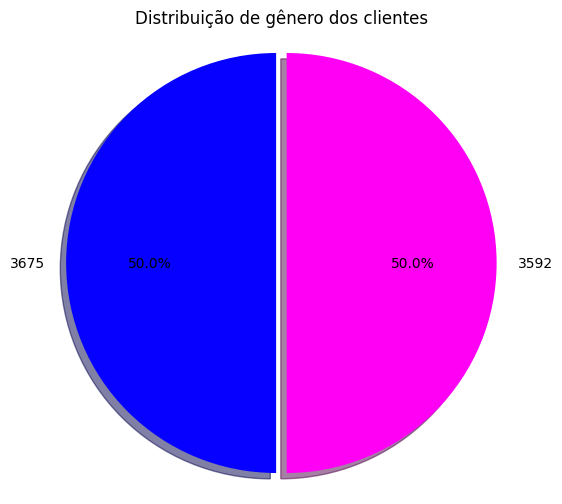

In [30]:
# Plotar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    contagem_genero,
    labels=contagem_genero.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#0500ff', '#ff00f5'],
    explode=(0.05, 0),  # Destaca a primeira fatia
    shadow=True
)
plt.title('Distribuição de gênero dos clientes')
plt.axis('equal')  # Deixa o gráfico redondo

plt.show()

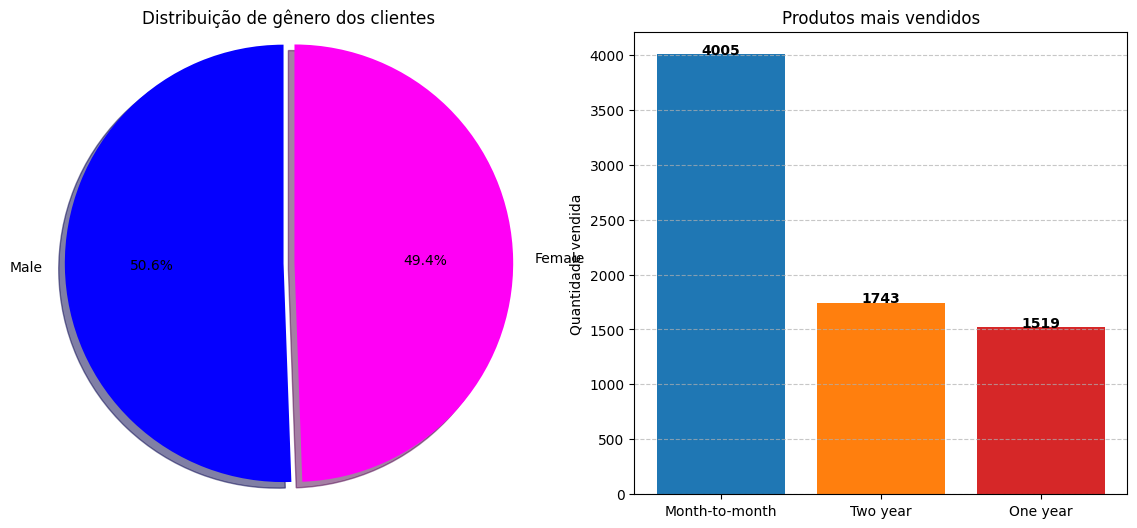

In [25]:
# Criando a figura com 2 subplots (1 linha, 2 colunas)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Primeiro subplot: Gráfico de Pizza
axs[0].pie(
    contagem_genero,
    labels=contagem_genero.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#0500ff', '#ff00f5'],
    explode=(0.05, 0),  # Destaca a primeira fatia
    shadow=True
)
axs[0].set_title('Distribuição de gênero dos clientes')
axs[0].axis('equal')  # Garante que o gráfico fique circular

# Segundo subplot: Gráfico de Barras (exemplo - personalize conforme sua necessidade)
nomes = ['Month-to-month', 'Two year', 'One year']
cores = ['#1f77b4', '#ff7f0e', '#d62728']

axs[1].bar(nomes, contratos, color=cores)
axs[1].set_title('Produtos mais vendidos')
axs[1].set_ylabel('Quantidade vendida')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando valores no topo das barras
for i, v in enumerate(contratos):
    axs[1].text(i, v + 3, str(v), ha='center', fontweight='bold')

# Ajustando layout
plt.show()

In [15]:
contratos

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


#📄Relatorio Final